In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
%matplotlib inline


In [2]:
def data_in_line(dir_path):
    csv_files_random = [f for f in os.listdir(
        dir_path) if f.endswith('.csv')]
    data = []
    for file in csv_files_random:
        file_path = os.path.join(dir_path, file)
        df = pd.read_csv(file_path).values.tolist()[:200]
        i = 0
        for i in range(len(df), 282):
            df.append([0.0])
        data.append(df)
    data_final = (np.array(data)[:, :, 0])
    return data_final

In [3]:
def main(data_re):
    def ecdf(data):
        """ Compute ECDF """
        x = np.sort(data)
        n = x.size
        y = np.arange(1, n+1) / n
        return (x, y)

    x, Fx = ecdf(data_re)
    linearized_Fx = -np.log(-np.log(Fx))

    return x,linearized_Fx

def main_nolin(data_re):
    def ecdf(data):
        """ Compute ECDF """
        x = np.sort(data)
        n = x.size
        y = np.arange(1, n+1) / n
        return (x, y)

    x, Fx = ecdf(data_re)
    return x,Fx

C:\Users\Hugo_Lancery_G14\AppData\Local\Temp\ipykernel_16768\1911278097.py:10: RuntimeWarning: divide by zero encountered in log
  linearized_Fx = -np.log(-np.log(Fx))


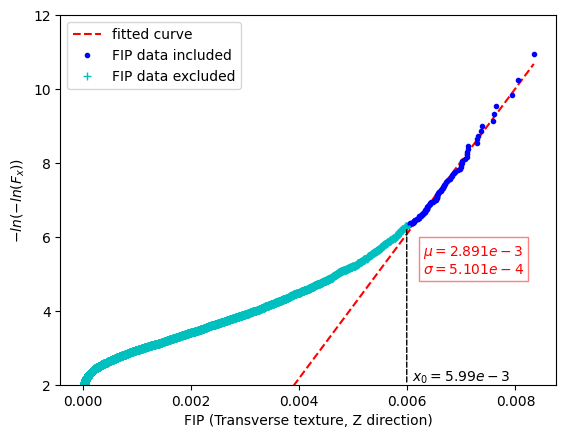

In [4]:
dir_path = 'C:/Users/Hugo_Lancery_G14/Desktop/General AERO 4/CIRI/FIP_data/FIP_each_SVE_Z_basal_transverse'
data_2D=data_in_line(dir_path)
size_x,size_y=np.shape(data_2D)
n=10
new_size_x=int(size_x/n)

x_max=[]
Fx_lin_max=[]

data_1D = np.reshape(data_2D,(1,size_y*size_x))
    
x_Z,Fx_lin_Z=main(data_1D)
x_Z=x_Z[0][:-1]
Fx_lin_Z=Fx_lin_Z[:-1]
itemindex = np.where(x_Z < 0.006)[0][-1]

x0_Z = x_Z[itemindex]
Fip0 = Fx_lin_Z[itemindex]

excluded_x, excluded_linearized_Fx = x_Z[:itemindex], Fx_lin_Z[:itemindex]
included_x, included_linearized_Fx= x_Z[itemindex:], Fx_lin_Z[itemindex:]

a_Z, b_Z = np.polyfit(included_x, included_linearized_Fx, 1)

sigma_Z = 1/a_Z
mu_Z = -sigma_Z*b_Z
plt.figure(1)
plt.annotate('', xy=(x0_Z, Fip0), xytext=(x0_Z, 2), arrowprops={
             'arrowstyle': '-', 'ls': 'dashed'})
plt.plot(x_Z, (x_Z-mu_Z)/sigma_Z, "--", color='r')
plt.text(x0_Z+0.0003, 5, "$\mu={}e-3$\n$\sigma={}e-4$".format(np.round(mu_Z*10**3, 3), np.round(sigma_Z*10**4, 3)),
         color='red', bbox=dict(boxstyle="square", ec=(1., 0.5, 0.5), fc=(1., 1., 1.),))
plt.plot(included_x, included_linearized_Fx, "b.")
plt.plot(excluded_x, excluded_linearized_Fx, "c+")
plt.text(x0_Z+0.0001, 2.1, "$x_0={}e-3$".format(np.round(x0_Z*10**3, 3)))
plt.legend(["fitted curve", "FIP data included", "FIP data excluded"])
plt.xlabel("FIP (Transverse texture, Z direction)")
# plt.xlim(2e-3, 9e-3)
plt.ylim(2, 12)
plt.ylabel('$-ln(-ln(F_x))$')
plt.show()

C:\Users\Hugo_Lancery_G14\AppData\Local\Temp\ipykernel_16768\1911278097.py:10: RuntimeWarning: divide by zero encountered in log
  linearized_Fx = -np.log(-np.log(Fx))


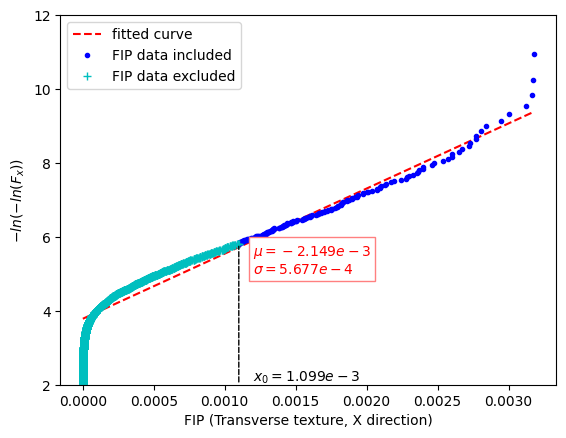

In [5]:
dir_path = 'C:/Users/Hugo_Lancery_G14/Desktop/General AERO 4/CIRI/FIP_data/FIP_each_SVE_X_basal_transverse'
data_2D=data_in_line(dir_path)
size_x,size_y=np.shape(data_2D)
n=10
new_size_x=int(size_x/n)

x_max=[]
Fx_lin_max=[]

data_1D = np.reshape(data_2D,(1,size_y*size_x))
    
x_X,Fx_lin_X=main(data_1D)
x_X=x_X[0][:-1]
Fx_lin_X=Fx_lin_X[:-1]
itemindex = np.where(x_X < 0.0011)[0][-1]

x0 = x_X[itemindex]
Fip0 = Fx_lin_X[itemindex]

excluded_x, excluded_linearized_Fx = x_X[:itemindex], Fx_lin_X[:itemindex]
included_x, included_linearized_Fx= x_X[itemindex:], Fx_lin_X[itemindex:]

a_X, b_X = np.polyfit(included_x, included_linearized_Fx, 1)

sigma_X = 1/a_X
mu_X = -sigma_X*b_X
plt.figure(2)
plt.annotate('', xy=(x0, Fip0), xytext=(x0, 2), arrowprops={
             'arrowstyle': '-', 'ls': 'dashed'})
plt.plot(x_X, a_X*x_X+b_X, "--", color='r')
plt.text(x0+0.0001, 5, "$\mu={}e-3$\n$\sigma={}e-4$".format(np.round(mu_X*10**3, 3), np.round(sigma_X*10**4, 3)),
         color='red', bbox=dict(boxstyle="square", ec=(1., 0.5, 0.5), fc=(1., 1., 1.),))
plt.plot(included_x, included_linearized_Fx, "b.")
plt.plot(excluded_x, excluded_linearized_Fx, "c+")
plt.text(x0+0.0001, 2.1, "$x_0={}e-3$".format(np.round(x0*10**3, 3)))
plt.legend(["fitted curve", "FIP data included", "FIP data excluded"])
plt.xlabel("FIP (Transverse texture, X direction)")
plt.ylim(2, 12)
plt.ylabel('$-ln(-ln(F_x))$')
plt.show()


C:\Users\Hugo_Lancery_G14\AppData\Local\Temp\ipykernel_16768\1911278097.py:10: RuntimeWarning: divide by zero encountered in log
  linearized_Fx = -np.log(-np.log(Fx))
C:\Users\Hugo_Lancery_G14\AppData\Local\Temp\ipykernel_16768\1911278097.py:10: RuntimeWarning: divide by zero encountered in log
  linearized_Fx = -np.log(-np.log(Fx))


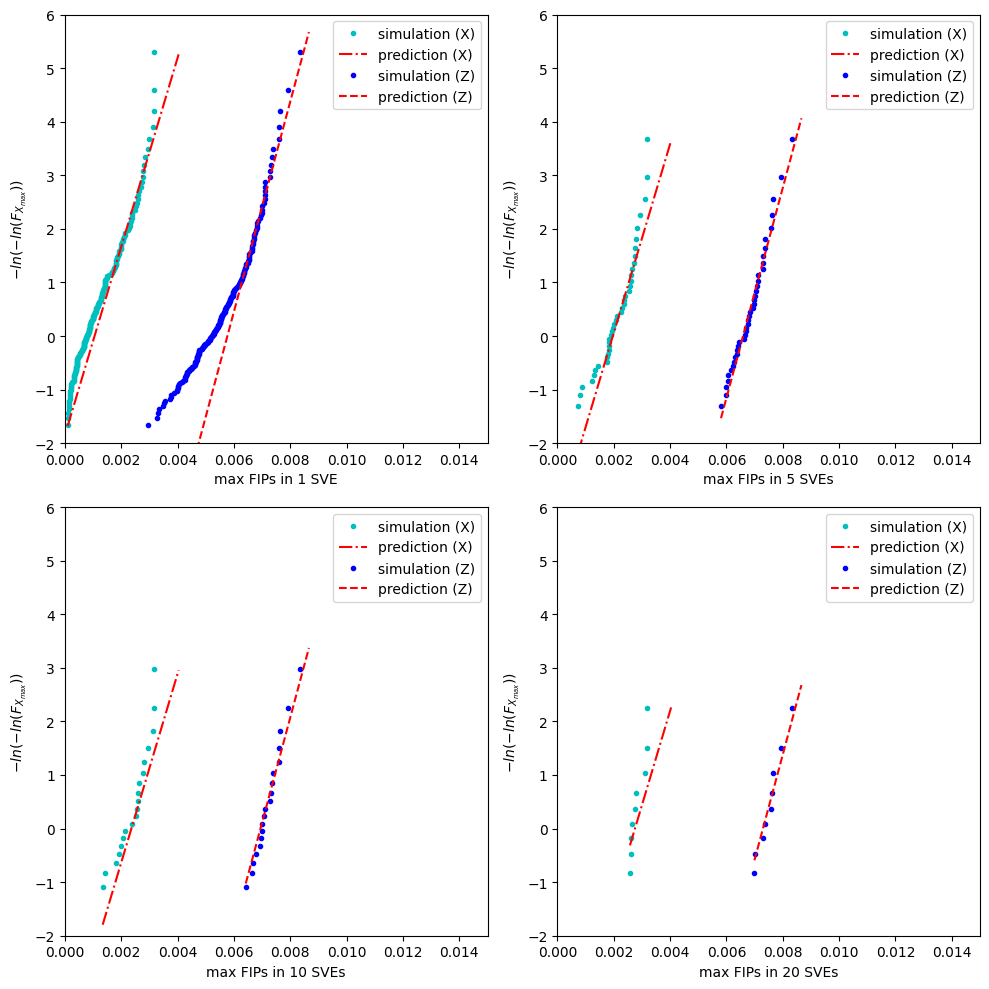

In [6]:

dir_path = 'C:/Users/Hugo_Lancery_G14/Desktop/General AERO 4/CIRI/FIP_data/FIP_each_SVE_X_basal_transverse'
data_2D_train = data_in_line(dir_path)
size_x_train, size_y_train = np.shape(data_2D_train)

x_max = []
Fx_lin_max = []

data_2D_train_1D = np.reshape(data_2D_train, (1, size_x_train*size_y_train))


def subplotutil(n):

    new_size_x_train=int(size_x_train/n)

    data_3D = np.reshape(data_2D_train[:n*new_size_x_train,:],(new_size_x_train,n,size_y_train))
    data_3D_2D = np.reshape(data_3D,(new_size_x_train,size_y_train*n))
    data_3D_max=[]
    for i in range(0, new_size_x_train):
        data_3D_max.append(data_3D_2D[i,:].max())
    
    x,Fx_lin=main(data_3D_max)
    
    return x,Fx_lin

mean_value_X=[]
for n in range(1,100,1):
    mean_value_X.append(np.mean(subplotutil(n)[0]))
    
    
x1,Fx_lin1=subplotutil(1)
x2,Fx_lin2=subplotutil(5)
x3,Fx_lin3=subplotutil(10)
x4,Fx_lin4=subplotutil(20)

fig=plt.figure(3)
fig.set_figheight(10)
fig.set_figwidth(10)
ax1 = plt.subplot(221)
ax1.plot(x1, Fx_lin1, "c.")
ax1.plot(x1, (x1-(mu_X+sigma_X*np.log(1*282)))/sigma_X,"-.",color='r')
#ax1.set_ylim(2, 7)
#ax1.set_xlim(0.0025, 0.004)
ax2 = plt.subplot(222)
ax2.plot(x2, Fx_lin2, "c.")
ax2.plot(x2, (x2-(mu_X+sigma_X*np.log(5*282)))/sigma_X,"-.",color='r')
ax3 = plt.subplot(223)
ax3.plot(x3, Fx_lin3, "c.")
ax3.plot(x3, (x3-(mu_X+sigma_X*np.log(10*282)))/sigma_X,"-.",color='r')
ax4 = plt.subplot(224)
ax4.plot(x4, Fx_lin4, "c.")
ax4.plot(x4, (x4-(mu_X+sigma_X*np.log(20*282)))/sigma_X,"-.",color='r')




dir_path = 'C:/Users/Hugo_Lancery_G14/Desktop/General AERO 4/CIRI/FIP_data/FIP_each_SVE_Z_basal_transverse'
data_2D_train = data_in_line(dir_path)
size_x_train, size_y_train = np.shape(data_2D_train)

x_max = []
Fx_lin_max = []

data_2D_train_1D = np.reshape(data_2D_train, (1, size_x_train*size_y_train))


mean_value_Z=[]
for n in range(1,100,1):
    mean_value_Z.append(np.mean(subplotutil(n)[0]))

x11,Fx_lin11=subplotutil(1)
x21,Fx_lin21=subplotutil(5)
x31,Fx_lin31=subplotutil(10)
x41,Fx_lin41=subplotutil(20)

ax1.plot(x11, Fx_lin11, "b.")
ax1.plot(x11, (x11-(mu_Z+sigma_Z*np.log(1*282)))/sigma_Z,"--",color='r')
#ax1.set_ylim(2, 7)
#ax1.set_xlim(0.0025, 0.004)
ax2.plot(x21, Fx_lin21, "b.")
ax2.plot(x21, (x21-(mu_Z+sigma_Z*np.log(5*282)))/sigma_Z,"--",color='r')
ax3.plot(x31, Fx_lin31, "b.")
ax3.plot(x31, (x31-(mu_Z+sigma_Z*np.log(10*282)))/sigma_Z,"--",color='r')
ax4.plot(x41, Fx_lin41, "b.")
ax4.plot(x41, (x41-(mu_Z+sigma_Z*np.log(20*282)))/sigma_Z,"--",color='r')

ax1.set_xlabel("max FIPs in 1 SVE")
ax2.set_xlabel("max FIPs in 5 SVEs")
ax3.set_xlabel("max FIPs in 10 SVEs")
ax4.set_xlabel("max FIPs in 20 SVEs")
ax1.legend(["simulation (X)","prediction (X)","simulation (Z)","prediction (Z)"])
ax2.legend(["simulation (X)","prediction (X)","simulation (Z)","prediction (Z)"])
ax3.legend(["simulation (X)","prediction (X)","simulation (Z)","prediction (Z)"])
ax4.legend(["simulation (X)","prediction (X)","simulation (Z)","prediction (Z)"])
ax1.set_ylabel("$-ln(-ln(F_{X_{max}}))$")
ax2.set_ylabel("$-ln(-ln(F_{X_{max}}))$")
ax3.set_ylabel("$-ln(-ln(F_{X_{max}}))$")
ax4.set_ylabel("$-ln(-ln(F_{X_{max}}))$")
ax1.set_xlim(0,0.015)
ax2.set_xlim(0,0.015)
ax3.set_xlim(0,0.015)
ax4.set_xlim(0,0.015)
ax1.set_ylim(-2,6)
ax2.set_ylim(-2,6)
ax3.set_ylim(-2,6)
ax4.set_ylim(-2,6)

plt.tight_layout()
plt.show()

In [7]:
dir_path = 'C:/Users/Hugo_Lancery_G14/Desktop/General AERO 4/CIRI/FIP_data/FIP_each_SVE_random'
data_2D_train = data_in_line(dir_path)[:200, :]
data_2D_test = data_in_line(dir_path)[200:, :]
size_x_train, size_y_train = np.shape(data_2D_train)
size_x_test, size_y_test = np.shape(data_2D_test)

C:\Users\Hugo_Lancery_G14\AppData\Local\Temp\ipykernel_16768\1911278097.py:10: RuntimeWarning: divide by zero encountered in log
  linearized_Fx = -np.log(-np.log(Fx))


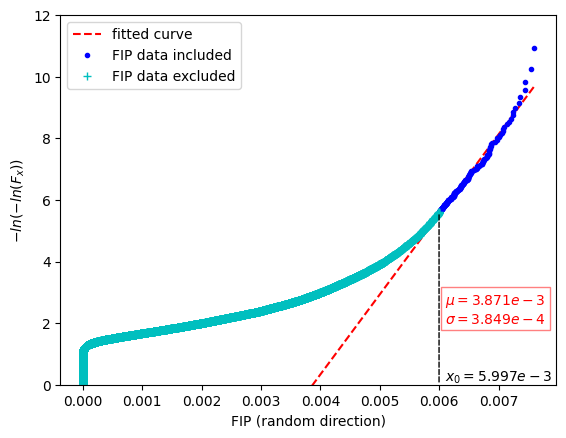

In [8]:
x_max = []
Fx_lin_max = []

data_2D_train_1D = np.reshape(data_2D_train, (1, size_x_train*size_y_train))

x, Fx_lin = main(data_2D_train_1D)

x = x[0][:-1]
Fx_lin = Fx_lin[:-1]
itemindex = np.where(x < 0.006)[0][-1]

x0 = x[itemindex]
Fip0 = Fx_lin[itemindex]

excluded_x, excluded_linearized_Fx = x[:itemindex], Fx_lin[:itemindex]
included_x, included_linearized_Fx = x[itemindex:], Fx_lin[itemindex:]
a_train, b_train = np.polyfit(included_x, included_linearized_Fx, 1)

sigma_train = 1/a_train
mu_train = -sigma_train*b_train
plt.figure(4)
plt.annotate('', xy=(x0, Fip0), xytext=(x0, 0), arrowprops={
             'arrowstyle': '-', 'ls': 'dashed'})
plt.plot(x, a_train*x+b_train, "--", color='r')
plt.text(x0+0.0001, 2, "$\mu={}e-3$\n$\sigma={}e-4$".format(np.round(mu_train*10**3, 3), np.round(sigma_train*10**4, 3)),
         color='red', bbox=dict(boxstyle="square", ec=(1., 0.5, 0.5), fc=(1., 1., 1.),))
plt.plot(included_x, included_linearized_Fx, "b.")
plt.plot(excluded_x, excluded_linearized_Fx, "c+")
plt.text(x0+0.0001, 0.1, "$x_0={}e-3$".format(np.round(x0*10**3, 3)))
plt.legend(["fitted curve", "FIP data included", "FIP data excluded"])
plt.xlabel("FIP (random direction)")
plt.ylim(0, 12)
plt.ylabel('$-ln(-ln(F_x))$')
plt.show()

C:\Users\Hugo_Lancery_G14\AppData\Local\Temp\ipykernel_16768\1911278097.py:10: RuntimeWarning: divide by zero encountered in log
  linearized_Fx = -np.log(-np.log(Fx))


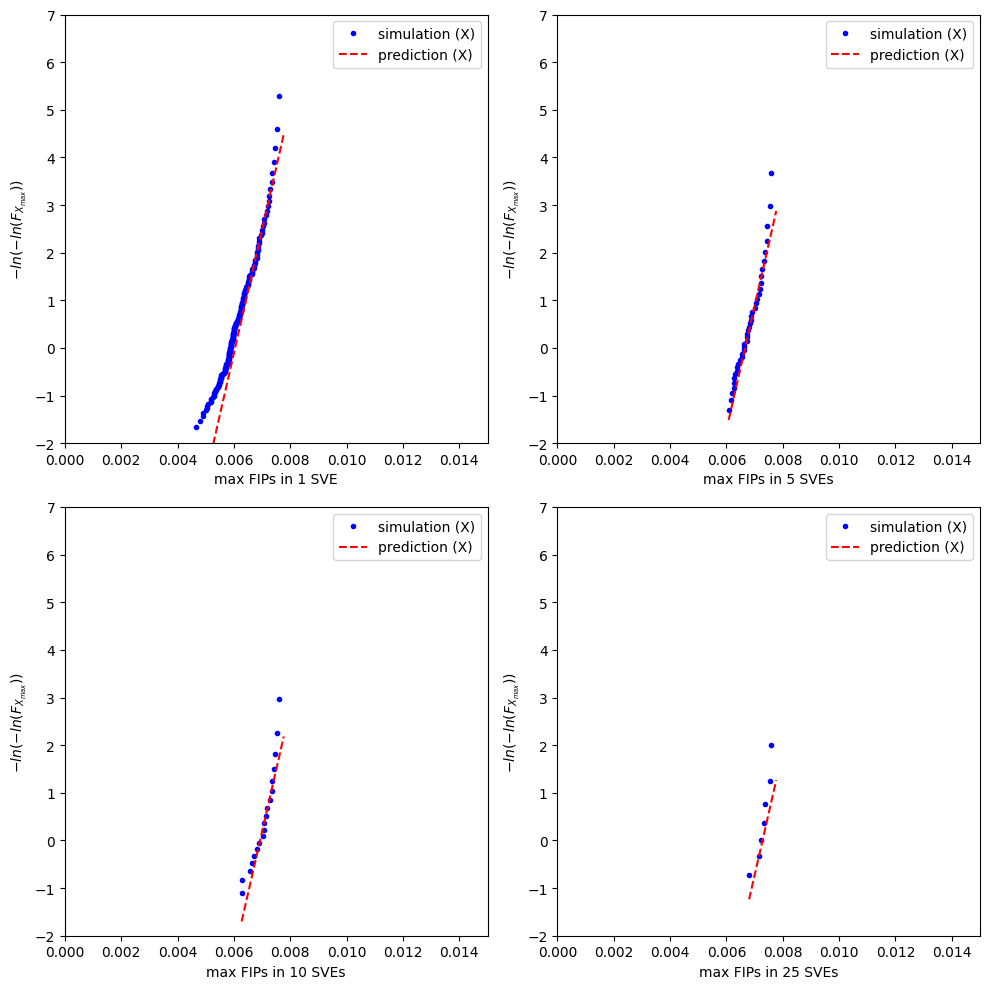

In [9]:
def subplotutil(n):
    
    new_size_x_train=int(size_x_train/n)

    data_3D = np.reshape(data_2D_train[:n*new_size_x_train,:],(new_size_x_train,n,size_y_train))
    data_3D_2D = np.reshape(data_3D,(new_size_x_train,size_y_train*n))
    data_3D_max=[]
    for i in range(0, new_size_x_train):
        data_3D_max.append(data_3D_2D[i,:].max())
    
    x,Fx_lin=main(data_3D_max)
    
    return x,Fx_lin

mean_value_rand=[]
for n in range(1,100,1):
    mean_value_rand.append(np.mean(subplotutil(n)[0]))
    
x1,Fx_lin1=subplotutil(1)
x2,Fx_lin2=subplotutil(5)
x3,Fx_lin3=subplotutil(10)
x4,Fx_lin4=subplotutil(25)

fig=plt.figure(5)
fig.set_figheight(10)
fig.set_figwidth(10)
ax1 = plt.subplot(221)
ax1.plot(x1, Fx_lin1, "b.")
ax1.plot(x1, (x1-(mu_train+sigma_train*np.log(1*282)))/sigma_train,"--",color='r')
ax1.set_xlim(0, 0.015)
ax1.set_ylim(-2, 7)
ax2 = plt.subplot(222)
ax2.plot(x2, Fx_lin2, "b.")
ax2.plot(x2, (x2-(mu_train+sigma_train*np.log(5*282)))/sigma_train,"--",color='r')
ax2.set_xlim(0, 0.015)
ax2.set_ylim(-2, 7)
ax3 = plt.subplot(223)
ax3.plot(x3, Fx_lin3, "b.")
ax3.plot(x3, (x3-(mu_train+sigma_train*np.log(10*282)))/sigma_train,"--",color='r')
ax3.set_xlim(0, 0.015)
ax3.set_ylim(-2, 7)
ax4 = plt.subplot(224)
ax4.plot(x4, Fx_lin4, "b.")
ax4.plot(x4, (x4-(mu_train+sigma_train*np.log(25*282)))/sigma_train,"--",color='r')
ax4.set_xlim(0, 0.015)
ax4.set_ylim(-2, 7)

ax1.set_xlabel("max FIPs in 1 SVE")
ax2.set_xlabel("max FIPs in 5 SVEs")
ax3.set_xlabel("max FIPs in 10 SVEs")
ax4.set_xlabel("max FIPs in 25 SVEs")
ax1.legend(["simulation (X)","prediction (X)","simulation (Z)","prediction (Z)"])
ax2.legend(["simulation (X)","prediction (X)","simulation (Z)","prediction (Z)"])
ax3.legend(["simulation (X)","prediction (X)","simulation (Z)","prediction (Z)"])
ax4.legend(["simulation (X)","prediction (X)","simulation (Z)","prediction (Z)"])
ax1.set_ylabel("$-ln(-ln(F_{X_{max}}))$")
ax2.set_ylabel("$-ln(-ln(F_{X_{max}}))$")
ax3.set_ylabel("$-ln(-ln(F_{X_{max}}))$")
ax4.set_ylabel("$-ln(-ln(F_{X_{max}}))$")
ax1.set_xlim(0,0.015)
ax2.set_xlim(0,0.015)
ax3.set_xlim(0,0.015)
ax4.set_xlim(0,0.015)
ax1.set_ylim(-2,7)
ax2.set_ylim(-2,7)
ax3.set_ylim(-2,7)
ax4.set_ylim(-2,7)

plt.tight_layout()
plt.show()

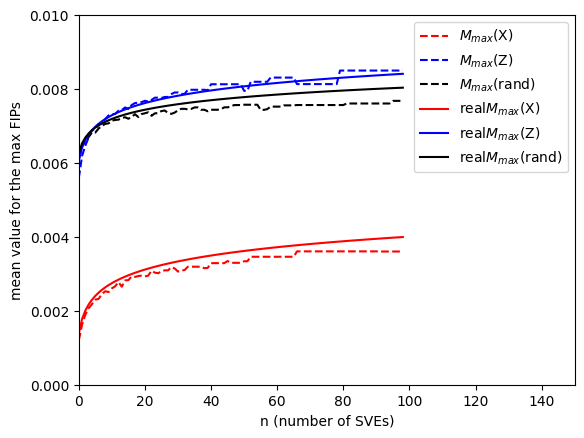

In [10]:
n=np.linspace(1,100,99)
plt.plot(mean_value_X,"--",color='r')
plt.plot(mean_value_Z,"--",color='b')
plt.plot(mean_value_rand,"--",color='black')
phi=0.577
Mmax_X=mu_X + sigma_X*np.log(n*282) + phi*sigma_X
Mmax_Z=mu_Z + sigma_Z*np.log(n*282) + phi*sigma_Z
Mmax_rand=mu_train + sigma_train*np.log(n*282) + phi*sigma_train
plt.plot(Mmax_X,'r')
plt.plot(Mmax_Z,'b')
plt.plot(Mmax_rand,'black')
plt.xlabel("n (number of SVEs)")
plt.ylabel("mean value for the max FIPs")
plt.legend(["$M_{max}$(X)","$M_{max}$(Z)","$M_{max}$(rand)","real$M_{max}$(X)","real$M_{max}$(Z)","real$M_{max}$(rand)"])
plt.ylim(0,0.01)
plt.xlim(0,150)
plt.show()